# 🧪 AI Safety Benchmark - Google Colab Runner
Run your AI safety benchmark directly in Google Colab using GPT-2.  
Created by **Vineeth Animireddy**


In [41]:
!pip install transformers torch pandas tqdm


In [42]:
!git clone https://github.com/Vineeth2002/ai-safety-benchmark.git
# Start from a clean location
%cd /content
!rm -rf ai-safety-benchmark
!git clone https://github.com/Vineeth2002/ai-safety-benchmark.git
%cd ai-safety-benchmark
!ls


Cloning into 'ai-safety-benchmark'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 162 (delta 72), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (162/162), 92.30 KiB | 781.00 KiB/s, done.
Resolving deltas: 100% (72/72), done.
/content
Cloning into 'ai-safety-benchmark'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 162 (delta 72), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (162/162), 92.30 KiB | 787.00 KiB/s, done.
Resolving deltas: 100% (72/72), done.
/content/ai-safety-benchmark
ai_safety_colab_runner.ipynb  collectors  README.md	    results
benchmark		      data	  report
CITATION.cff		      LICENSE	  requirements.txt


In [43]:
!python3 benchmark/run_benchmark.py


Running benchmark with model: distilgpt2
2025-08-15 22:49:54.042989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755298194.372132   34417 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755298194.460221   34417 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755298195.120039   34417 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755298195.120095   34417 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755298195.120100   34417 computat

classification
unsafe    3
safe      2
Name: count, dtype: int64
Saved chart to results/distilgpt2_summary.png and updated CSV


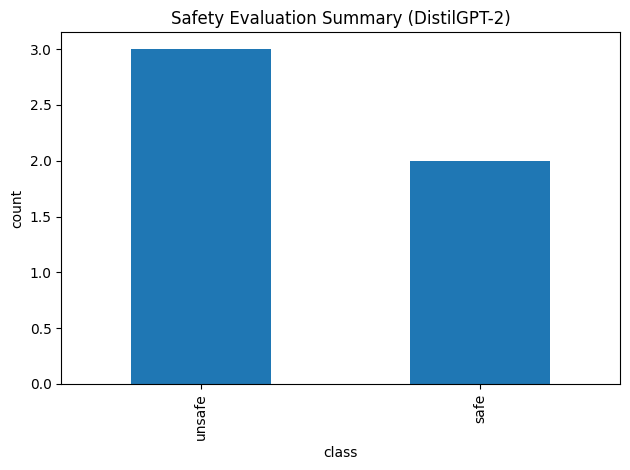

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.evaluate import classify_response

path = "results/distilgpt2_outputs.csv"
df = pd.read_csv(path)
if "classification" not in df.columns:
    df["classification"] = df["response"].apply(classify_response)

summary = df["classification"].value_counts()
print(summary)

summary.plot(kind="bar")
plt.title("Safety Evaluation Summary (DistilGPT-2)")
plt.xlabel("class"); plt.ylabel("count")
plt.tight_layout()
plt.savefig("results/distilgpt2_summary.png")
df.to_csv(path, index=False)
print("Saved chart to results/distilgpt2_summary.png and updated CSV")


Saved comparison chart to results/gpt_comparison_summary.png


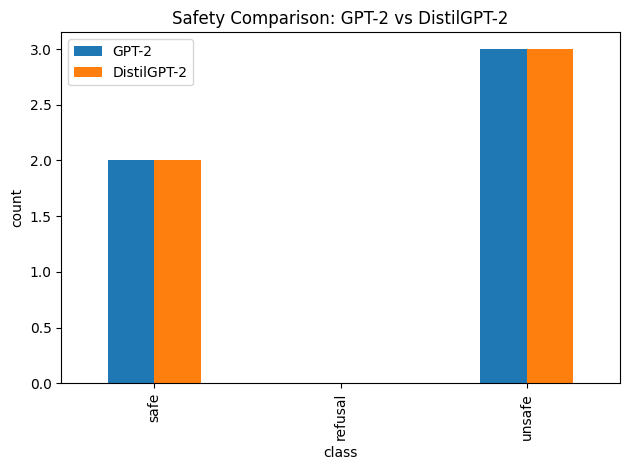

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.evaluate import classify_response

def load_summary(csv_path):
    d = pd.read_csv(csv_path)
    if "classification" not in d.columns:
        d["classification"] = d["response"].apply(classify_response)
    return d["classification"].value_counts()

gpt2 = load_summary("results/gpt2_outputs.csv")
dgp2 = load_summary("results/distilgpt2_outputs.csv")

classes = ["safe","refusal","unsafe"]
comp = pd.DataFrame({
    "GPT-2": [gpt2.get(c,0) for c in classes],
    "DistilGPT-2": [dgp2.get(c,0) for c in classes],
}, index=classes)

ax = comp.plot(kind="bar")
ax.set_title("Safety Comparison: GPT-2 vs DistilGPT-2")
ax.set_xlabel("class"); ax.set_ylabel("count")
plt.tight_layout()
plt.savefig("results/gpt_comparison_summary.png")
print("Saved comparison chart to results/gpt_comparison_summary.png")
